In [11]:
EXPECTED_COLUMNS = {
    "order_id",
    "order_date",
    "total_amount",
    "city",
    "membership",
    "cuisine",
    "rating"
}

missing = EXPECTED_COLUMNS - set(df.columns)

if missing:
    raise ValueError(f"Missing columns in dataset: {missing}")

print("✅ Schema validation passed")


✅ Schema validation passed


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../output/final_food_delivery_dataset.csv")
df["order_date"] = pd.to_datetime(df["order_date"])

C:\Users\MAHENDER\AppData\Local\Temp\ipykernel_20092\3165016138.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


In [4]:
membership_revenue = (
    df.groupby("membership")["total_amount"]
      .agg(["count", "sum", "mean"])
)

membership_revenue


,count,sum,mean
membership,,,
Gold,4987,3975364.89,797.145556
Regular,5013,4036259.23,805.158434


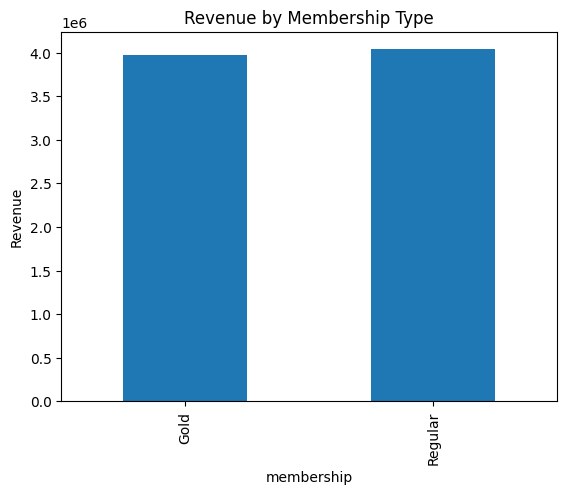

In [5]:
membership_revenue["sum"].plot(
    kind="bar",
    title="Revenue by Membership Type"
)

plt.ylabel("Revenue")
plt.show()


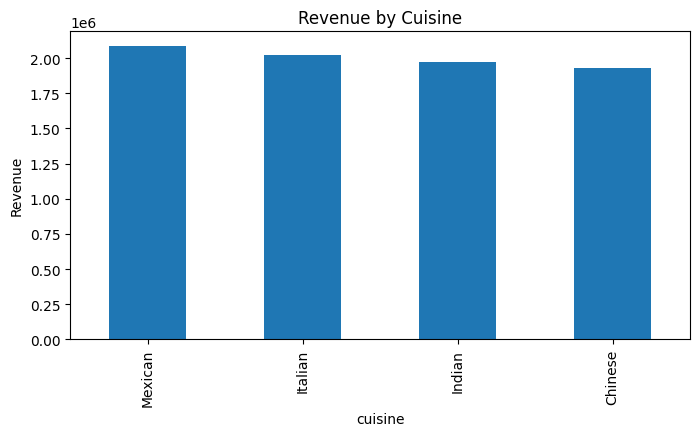

In [6]:
cuisine_perf = (
    df.groupby("cuisine")["total_amount"]
      .sum()
      .sort_values(ascending=False)
)

cuisine_perf.plot(
    kind="bar",
    figsize=(8,4),
    title="Revenue by Cuisine"
)

plt.ylabel("Revenue")
plt.show()


In [7]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%d-%m-%Y")


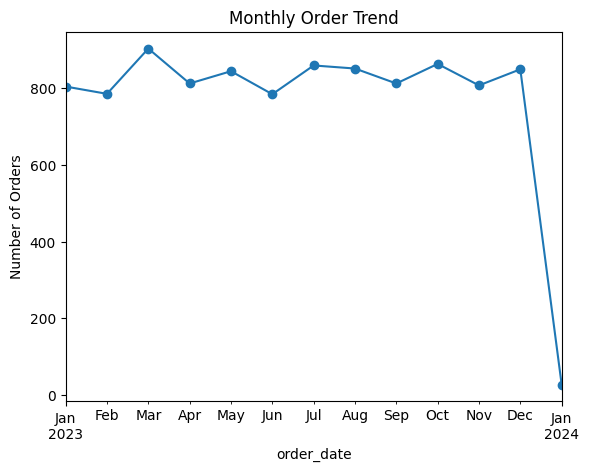

In [8]:
monthly_orders = (
    df.groupby(df["order_date"].dt.to_period("M"))
      .size()
)

monthly_orders.plot(
    kind="line",
    title="Monthly Order Trend",
    marker="o"
)

plt.ylabel("Number of Orders")
plt.show()


In [19]:
#Question - 1
import pandas as pd

# Load the final dataset

df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Filter only Gold members
gold_members = df[df['membership'] == 'Gold']

# Group by city and sum the total_amount
city_revenue = gold_members.groupby('city')['total_amount'].sum()

# Sort descending to get the city with highest revenue
city_revenue = city_revenue.sort_values(ascending=False)

print("Total revenue from Gold members by city:\n")
print(city_revenue)

# Get the city with highest revenue
top_city = city_revenue.idxmax()
top_revenue = city_revenue.max()
print(f"\nCity with highest revenue from Gold members: {top_city} (${top_revenue})")


Total revenue from Gold members by city:

city
Chennai      1080909.79
Pune         1003012.32
Bangalore     994702.59
Hyderabad     896740.19
Name: total_amount, dtype: float64

City with highest revenue from Gold members: Chennai ($1080909.79)


In [2]:
#Question - 2
import pandas as pd

# Load the final dataset

df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Group by cuisine and calculate average order value
avg_order_value = df.groupby('cuisine')['total_amount'].mean()

# Sort descending to find the cuisine with highest average
avg_order_value = avg_order_value.sort_values(ascending=False)

print("Average order value by cuisine:\n")
print(avg_order_value)

# Get the cuisine with highest average order value
top_cuisine = avg_order_value.idxmax()
top_value = avg_order_value.max()
print(f"\nCuisine with highest average order value: {top_cuisine} (${top_value:.2f})")


Average order value by cuisine:

cuisine
Mexican    808.021344
Italian    799.448578
Indian     798.466011
Chinese    798.389020
Name: total_amount, dtype: float64

Cuisine with highest average order value: Mexican ($808.02)


In [4]:
# Question - 3
import pandas as pd

# Load the final dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Group by user and sum their total order amounts
user_total = df.groupby('user_id')['total_amount'].sum()

# Filter users with total orders > 1000
high_value_users = user_total[user_total > 1000]

# Count the number of distinct users
num_users = high_value_users.shape[0]

print(f"Number of distinct users with total orders > ₹1000: {num_users}")


Number of distinct users with total orders > ₹1000: 2544


In [ ]:
# Question - 4
import pandas as pd

# Load CSV
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert 'rating' to numeric (ignore errors for bad data)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Now create bins for rating range
bins = [0, 3.5, 4.0, 4.5, 5.0]
labels = ["3.0 – 3.5", "3.6 – 4.0", "4.1 – 4.5", "4.6 – 5.0"]

df['rating_range'] = pd.cut(df['rating'], bins=bins, labels=labels, include_lowest=True)

# Group by rating range and sum total revenue
revenue_by_rating = df.groupby('rating_range')['total_amount'].sum().sort_values(ascending=False)

print("Total revenue by restaurant rating range:\n")
print(revenue_by_rating)

# Top range
top_rating_range = revenue_by_rating.idxmax()
top_revenue = revenue_by_rating.max()
print(f"\nRestaurant rating range with highest total revenue: {top_rating_range} (${top_revenue:.2f})")


Total revenue by restaurant rating range:

rating_range
4.6 – 5.0    2197030.75
3.0 – 3.5    2136772.70
4.1 – 4.5    1960326.26
3.6 – 4.0    1717494.41
Name: total_amount, dtype: float64

Restaurant rating range with highest total revenue: 4.6 – 5.0 ($2197030.75)


C:\Users\MAHENDER\AppData\Local\Temp\ipykernel_25832\1111592935.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_rating = df.groupby('rating_range')['total_amount'].sum().sort_values(ascending=False)


In [8]:
# Question - 5
import pandas as pd

# Load the final dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure total_amount is numeric
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Filter only Gold members
gold_members = df[df['membership'] == 'Gold']

# Group by city and calculate average order value
avg_order_by_city = gold_members.groupby('city')['total_amount'].mean().sort_values(ascending=False)

print("Average order value among Gold members by city:\n")
print(avg_order_by_city)

# Get the city with highest average order value
top_city = avg_order_by_city.idxmax()
top_value = avg_order_by_city.max()
print(f"\nCity with highest average order value among Gold members: {top_city} (${top_value:.2f})")


Average order value among Gold members by city:

city
Chennai      808.459080
Hyderabad    806.421034
Bangalore    793.223756
Pune         781.162243
Name: total_amount, dtype: float64

City with highest average order value among Gold members: Chennai ($808.46)


In [9]:
# Question - 6

import pandas as pd

# Load the dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Count distinct restaurants per cuisine
restaurant_counts = df.groupby('cuisine')['restaurant_id'].nunique()

# Sum total revenue per cuisine
revenue_per_cuisine = df.groupby('cuisine')['total_amount'].sum()

# Combine both metrics
summary = pd.DataFrame({
    'distinct_restaurants': restaurant_counts,
    'total_revenue': revenue_per_cuisine
}).sort_values(by=['distinct_restaurants', 'total_revenue'], ascending=[True, False])

print("Cuisine summary (fewest restaurants first, revenue descending):\n")
print(summary)

# Pick cuisine with fewest restaurants but high revenue
target_cuisine = summary.iloc[0].name
print(f"\nCuisine with lowest distinct restaurants but significant revenue: {target_cuisine}")


Cuisine summary (fewest restaurants first, revenue descending):

         distinct_restaurants  total_revenue
cuisine                                     
Chinese                   120     1930504.65
Italian                   126     2024203.80
Indian                    126     1971412.58
Mexican                   128     2085503.09

Cuisine with lowest distinct restaurants but significant revenue: Chinese


In [10]:
# Question - 7
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Total number of orders
total_orders = df.shape[0]

# Number of orders by Gold members
gold_orders = df[df['membership'] == 'Gold'].shape[0]

# Calculate percentage
gold_order_pct = round((gold_orders / total_orders) * 100)

print(f"Percentage of total orders placed by Gold members: {gold_order_pct}%")


Percentage of total orders placed by Gold members: 50%


In [11]:
# Question - 8
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Group by restaurant and calculate total orders and average order value
restaurant_stats = df.groupby('restaurant_name_y').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
)

# Filter restaurants with fewer than 20 total orders
small_restaurants = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Find the restaurant with the highest average order value
top_restaurant = small_restaurants['avg_order_value'].idxmax()
top_value = small_restaurants['avg_order_value'].max()

print("Restaurants with <20 total orders and their average order value:\n")
print(small_restaurants.sort_values(by='avg_order_value', ascending=False))

print(f"\nRestaurant with highest average order value (<20 orders): {top_restaurant} (${top_value:.2f})")


Restaurants with <20 total orders and their average order value:

                   total_orders  avg_order_value
restaurant_name_y                               
Restaurant_294               13      1040.222308
Restaurant_262               18      1029.473333
Restaurant_77                12      1029.180833
Restaurant_193               15      1026.306667
Restaurant_7                 16      1002.140625
...                         ...              ...
Restaurant_184               19       621.828947
Restaurant_498               18       596.815556
Restaurant_192               14       589.972857
Restaurant_329               15       578.578667
Restaurant_300               17       572.686471

[241 rows x 2 columns]

Restaurant with highest average order value (<20 orders): Restaurant_294 ($1040.22)


In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Group by restaurant ID and actual name, calculate total orders and avg order value
restaurant_stats = df.groupby(['restaurant_id', 'restaurant_name_y']).agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
)

# Filter restaurants with fewer than 20 total orders
small_restaurants = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Find restaurant with highest average order value
top_restaurant = small_restaurants['avg_order_value'].idxmax()
top_value = small_restaurants['avg_order_value'].max()

restaurant_id, restaurant_name = top_restaurant

print(f"Restaurant with highest average order value (<20 orders): {restaurant_name} (ID: {restaurant_id}) — ${top_value:.2f}")


Restaurant with highest average order value (<20 orders): Restaurant_294 (ID: 294) — $1040.22


In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Strip spaces in restaurant names too
df['restaurant_name_y'] = df['restaurant_name_y'].str.strip()

# Ensure total_amount is numeric
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Group by restaurant name only (ignore ID for readability)
restaurant_stats = df.groupby('restaurant_name_y').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('total_amount', 'mean')
)

# Filter restaurants with fewer than 20 total orders
small_restaurants = restaurant_stats[restaurant_stats['total_orders'] < 20]

# Find restaurant with highest average order value
top_restaurant_name = small_restaurants['avg_order_value'].idxmax()
top_value = small_restaurants['avg_order_value'].max()

print(f"Restaurant with highest average order value (<20 orders): {top_restaurant_name} — ${top_value:.2f}")


Restaurant with highest average order value (<20 orders): Restaurant_294 — $1040.22


In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Group by membership and cuisine, sum total revenue
combo_revenue = df.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)

print("Total revenue by membership + cuisine combination:\n")
print(combo_revenue)

# Top combination
top_combo = combo_revenue.idxmax()
top_value = combo_revenue.max()
print(f"\nCombination with highest revenue: {top_combo[0]} + {top_combo[1]} (${top_value:.2f})")


Total revenue by membership + cuisine combination:

membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

Combination with highest revenue: Regular + Mexican ($1072943.30)


In [16]:
# Question  - 9
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Define the four combinations to check
combinations = [
    ('Gold', 'Indian'),
    ('Gold', 'Italian'),
    ('Regular', 'Indian'),
    ('Regular', 'Chinese')
]

# Filter dataset for these combinations
filtered = df[df.apply(lambda x: (x['membership'], x['cuisine']) in combinations, axis=1)]

# Group by membership + cuisine and sum total_amount
combo_revenue = filtered.groupby(['membership', 'cuisine'])['total_amount'].sum().sort_values(ascending=False)

print("Revenue for selected membership + cuisine combinations:\n")
print(combo_revenue)

# Top combination
top_combo = combo_revenue.idxmax()
top_value = combo_revenue.max()
print(f"\nCombination with highest revenue: {top_combo[0]} + {top_combo[1]} (${top_value:.2f})")


Revenue for selected membership + cuisine combinations:

membership  cuisine
Gold        Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
Regular     Chinese     952790.91
Name: total_amount, dtype: float64

Combination with highest revenue: Gold + Italian ($1005779.05)


In [17]:
# Question - 10
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')

# Define quarter based on month
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1 (Jan–Mar)'
    elif month in [4, 5, 6]:
        return 'Q2 (Apr–Jun)'
    elif month in [7, 8, 9]:
        return 'Q3 (Jul–Sep)'
    else:
        return 'Q4 (Oct–Dec)'

df['quarter'] = df['order_date'].dt.month.apply(get_quarter)

# Group by quarter and sum total revenue
revenue_by_quarter = df.groupby('quarter')['total_amount'].sum().sort_values(ascending=False)

print("Total revenue by quarter:\n")
print(revenue_by_quarter)

# Quarter with highest revenue
top_quarter = revenue_by_quarter.idxmax()
top_revenue = revenue_by_quarter.max()
print(f"\nQuarter with highest total revenue: {top_quarter} (${top_revenue:.2f})")


Total revenue by quarter:

quarter
Q3 (Jul–Sep)    2037385.10
Q4 (Oct–Dec)    2018263.66
Q1 (Jan–Mar)    2010626.64
Q2 (Apr–Jun)    1945348.72
Name: total_amount, dtype: float64

Quarter with highest total revenue: Q3 (Jul–Sep) ($2037385.10)


In [18]:
# Question - 11
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Count orders placed by Gold members
gold_orders = df[df['membership'] == 'Gold'].shape[0]

print(f"Total orders placed by Gold members: {gold_orders}")


Total orders placed by Gold members: 4987


In [ ]:
# Question - 12
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Filter orders from Hyderabad
hyderabad_orders = df[df['city'] == 'Hyderabad']

# Sum total revenue and round
total_revenue_hyderabad = round(hyderabad_orders['total_amount'].sum())

print(f"Total revenue generated from Hyderabad: ₹{total_revenue_hyderabad}")


Total revenue generated from Hyderabad: ₹1889367


In [20]:
# Question - 13
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Count distinct users who placed at least one order
distinct_users = df['user_id'].nunique()

print(f"Number of distinct users who placed at least one order: {distinct_users}")


Number of distinct users who placed at least one order: 2883


In [21]:
# Question - 14
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Filter Gold members
gold_orders = df[df['membership'] == 'Gold']

# Calculate average order value
avg_order_value_gold = round(gold_orders['total_amount'].mean(), 2)

print(f"Average order value for Gold members: ₹{avg_order_value_gold}")


Average order value for Gold members: ₹797.15


In [22]:
# Question - 15
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric rating
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Filter orders where restaurant rating >= 4.5
high_rating_orders = df[df['rating'] >= 4.5]

# Count number of orders
num_high_rating_orders = high_rating_orders.shape[0]

print(f"Number of orders for restaurants with rating ≥ 4.5: {num_high_rating_orders}")


Number of orders for restaurants with rating ≥ 4.5: 3374


In [23]:
# Question - 16
import pandas as pd

# Load dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Ensure numeric total_amount
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Filter only Gold members
gold_df = df[df['membership'] == 'Gold']

# Find the top revenue city among Gold members
revenue_by_city = gold_df.groupby('city')['total_amount'].sum()
top_city = revenue_by_city.idxmax()

# Count number of orders in that city
orders_in_top_city = gold_df[gold_df['city'] == top_city].shape[0]

print(f"Top revenue city among Gold members: {top_city}")
print(f"Number of orders placed in {top_city} by Gold members: {orders_in_top_city}")


Top revenue city among Gold members: Chennai
Number of orders placed in Chennai by Gold members: 1337


In [24]:
# Question - 19
import pandas as pd

# Load final merged dataset
df = pd.read_csv("../output/final_food_delivery_dataset.csv")

# Total number of rows
total_rows = df.shape[0]

print(f"Total number of rows in final merged dataset: {total_rows}")


Total number of rows in final merged dataset: 10000
